In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/QCOM_stock.csv")
df.head()

#The 50-day simple moving average is a trendline that shows the average of 50 days of closing prices for a stock, plotted over time.

#The 20-day simple moving average is a trendline that shows the average of 20 days of closing prices for a stock, plotted over time.

,Date,Close,High,Low,Open,Volume,Daily_Return,SMA_20,SMA_50
0,2015-12-15,36.414829,37.013908,35.489670,36.179747,20086900,0.025411,37.411386,40.788302
1,2015-12-16,36.452755,36.854667,35.755096,36.589254,13308300,0.001041,37.244855,40.671528
2,2015-12-17,36.050838,37.612989,36.050838,37.400659,15328000,-0.011026,37.245205,40.542362
3,2015-12-18,35.967422,36.430002,35.656509,35.921922,46440200,-0.002314,37.226743,40.395757
4,2015-12-21,36.975990,37.104907,36.050834,36.103917,16779000,0.028041,37.212527,40.267522


In [ ]:
df.shape

(2465, 9)

In [ ]:
df.describe()

,Close,High,Low,Open,Volume,Daily_Return,SMA_20,SMA_50
count,2465.000000,2465.000000,2465.000000,2465.000000,2.465000e+03,2465.000000,2465.000000,2465.000000
mean,97.400053,98.687339,96.078689,97.399959,1.021847e+07,0.000909,96.898274,96.175343
std,45.991980,46.685810,45.283182,46.025509,6.944566e+06,0.023552,45.727735,45.376300
min,32.577702,32.827948,32.031705,32.236451,2.120200e+06,-0.149452,34.398065,35.739317
25%,51.368263,51.925939,50.575363,51.341037,6.692000e+06,-0.009794,50.702521,50.198510
50%,103.638298,105.133540,102.227993,103.751225,8.513700e+06,0.000844,105.008590,106.180874
75%,134.037567,135.888633,132.070824,134.334803,1.170130e+07,0.012234,134.514559,131.288495
max,220.949265,224.393548,219.888743,220.686576,1.560193e+08,0.232074,205.336111,197.670691


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2465 entries, 0 to 2464
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2465 non-null   object 
 1   Close         2465 non-null   float64
 2   High          2465 non-null   float64
 3   Low           2465 non-null   float64
 4   Open          2465 non-null   float64
 5   Volume        2465 non-null   int64  
 6   Daily_Return  2465 non-null   float64
 7   SMA_20        2465 non-null   float64
 8   SMA_50        2465 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 173.4+ KB


In [ ]:
df.isnull().sum()

,0
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0
Daily_Return,0
SMA_20,0
SMA_50,0


In [ ]:
df1=df[0:50]
df1['Close'].mean()

np.float64(35.97515579223633)

In [ ]:
outliers={}
for col in df.columns:
  if df[col].dtype in ['int64','float64']:

    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    print(f"lower value of {col} :",lower)
    print(f"upper value of {col} :",upper)
    print('\n')
    outlier_values = df.loc[(df[col] < lower) | (df[col] > upper), col].values
    outliers[col] = outlier_values

print("Outliers in each column")
for col,value in outliers.items():
  print(col,value)
  print('\n')


lower value of Close : -72.63569259643555
upper value of Close : 258.0415229797363


lower value of High : -74.01810173780869
upper value of High : 261.83267448172614


lower value of Low : -71.66782880481921
upper value of Low : 254.3140160373772


lower value of Open : -73.14961316266667
upper value of Open : 258.82545334679185


lower value of Volume : -821950.0
upper value of Volume : 19215250.0


lower value of Daily_Return : -0.0428366491109381
upper value of Daily_Return : 0.0452764039905659


lower value of SMA_20 : -75.01553592681886
upper value of SMA_20 : 260.2326162338257


lower value of SMA_50 : -71.43646686553954
upper value of SMA_50 : 252.92347240447998


Outliers in each column
Close []


High []


Low []


Open []


Volume [ 20086900  46440200  20495600  21649400  27935200  24039200  21079700
  21052300  28991500  33912300  43098800  34879500  19676600  33941700
  22426300  20936900  94436000  41751800  27307900  37888200  23474400
  20057800  24822200  24664600  343

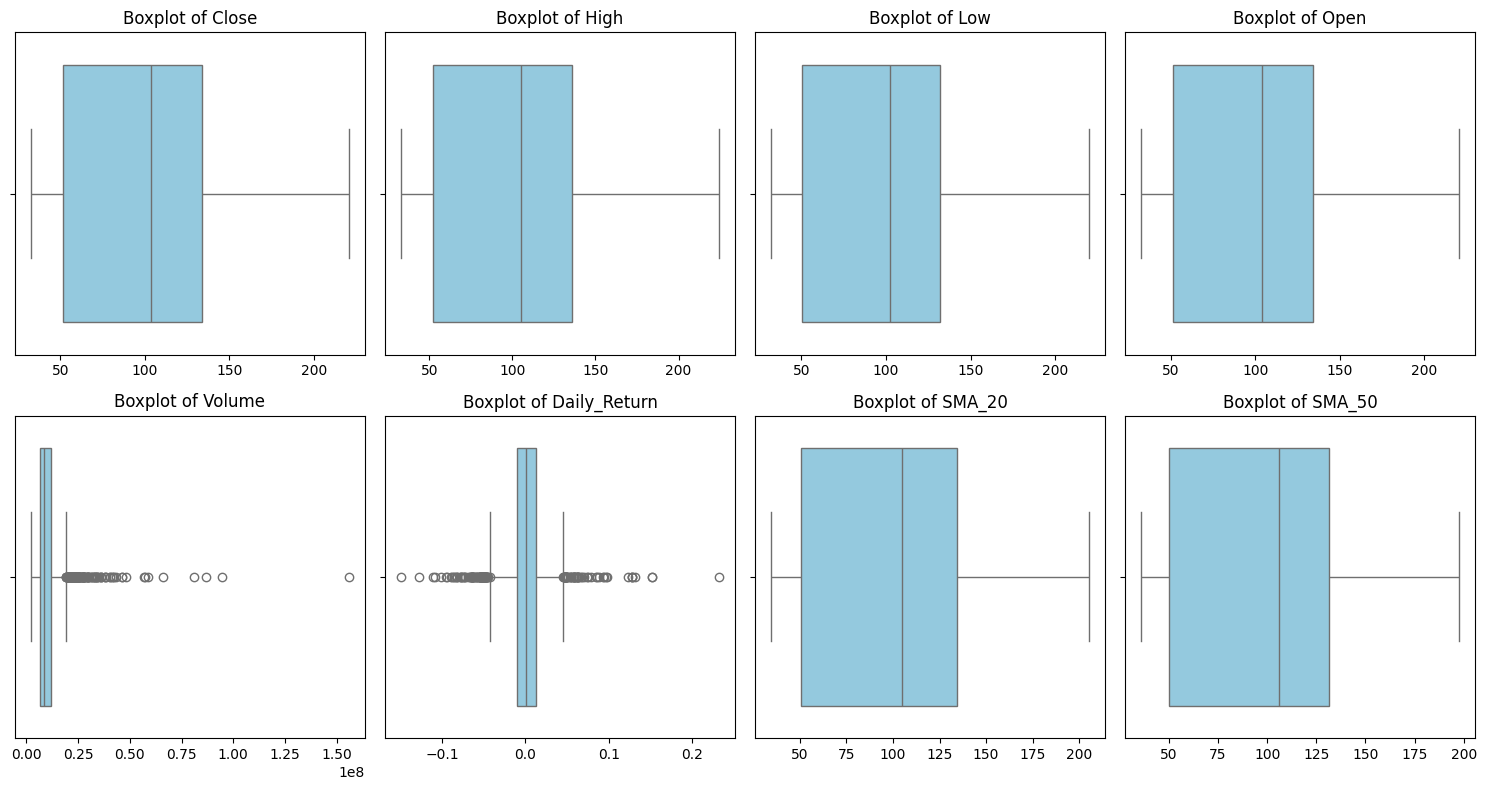

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, int(np.ceil(len(numeric_cols)/2)), i)
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')
plt.tight_layout()
plt.show()


                 Close      High       Low      Open    Volume  Daily_Return  \
Close         1.000000  0.999533  0.999596  0.999037 -0.185901      0.020202   
High          0.999533  1.000000  0.999440  0.999574 -0.178686      0.003340   
Low           0.999596  0.999440  1.000000  0.999557 -0.192573      0.003700   
Open          0.999037  0.999574  0.999557  1.000000 -0.186563     -0.011650   
Volume       -0.185901 -0.178686 -0.192573 -0.186563  1.000000      0.063585   
Daily_Return  0.020202  0.003340  0.003700 -0.011650  0.063585      1.000000   
SMA_20        0.991980  0.992844  0.991959  0.992749 -0.190262     -0.024757   
SMA_50        0.979487  0.980721  0.979073  0.980278 -0.190086     -0.024075   

                SMA_20    SMA_50  
Close         0.991980  0.979487  
High          0.992844  0.980721  
Low           0.991959  0.979073  
Open          0.992749  0.980278  
Volume       -0.190262 -0.190086  
Daily_Return -0.024757 -0.024075  
SMA_20        1.000000  0.992333  

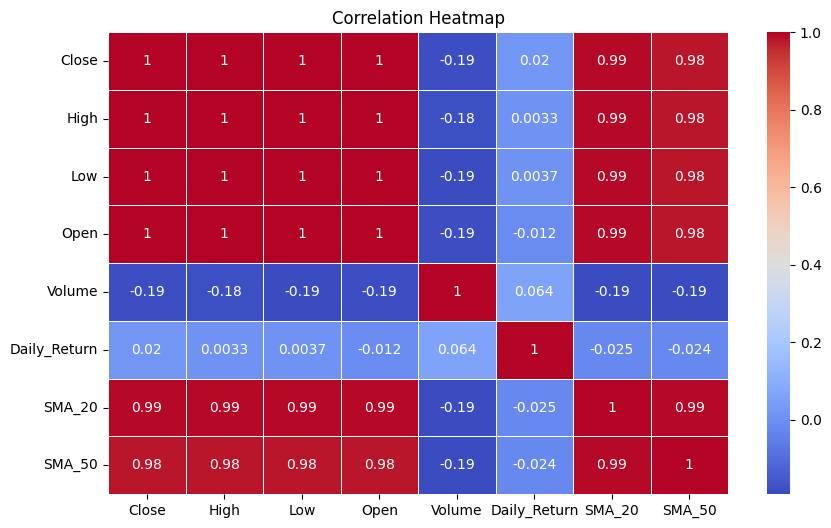

In [34]:
correlation_matrix = df.drop('Date', axis=1).corr()
print(correlation_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()